# Ejercicio 

El objetivo de este trabajo es hacer un análisis del endeudamiento público por países.

### Conjunto de datos

Datos del banco mundial: [Deuda pública países](http://aprendeconalf.es/python/trabajos/datos/deuda-publica.csv) y [PIB países](http://aprendeconalf.es/python/trabajos/datos/pib.csv).

# Solución

## Sin usar la librería Pandas

1. Crear una función que reciba un país y un tipo de deuda y devuelva un diccionario con todos los periodos y la cantidad de deuda en esos periodos de ese país y tipo de deuda.

In [2]:
# Preprocesamos primero el fichero para obtener un diccionario de diccionarios con las series de deudadas de cada país.
# Abrimos el fichero
f = open('http://aprendeconalf.es/python/trabajos/datos/deuda.csv')
# Creamos una lista con las líneas del fichero.
lineas = f.readlines()
f.close()
# Dividimos la primera línea del fichero que contiene los nombres de las columnas y creamos una lista con los nombres de las columnas.
columnas = lineas[0].split(',')

# Creamos un diccionario vacío para ir añadiendo las series de deuda de cada país.
deudas = {}
# Recorremos las lineas del fichero desde la 1 hasta el final
for linea in lineas[1:]:
    # Creamos el diccionario que contendrá la información de una serie país-tipo deuda.
    serie = {}
    # Creamos una lista con los campos partiendo la línea por el carácter ,.
    campos = linea.split(',')
    # Recorremos los campos de la línea
    for i in range(4, len(columnas)):
        # Para cada campo añadimos al diccionario el par con clave el nombre de la columna y valor el campo de la posición i.
        serie[columnas[i][:6]] = campos[i]
    # Añadimos el diccionario a la lista de alojamientos.
    deudas[(campos[1], campos[3])] = serie

print(deudas)

FileNotFoundError: [Errno 2] No such file or directory: 'deuda.csv'

In [ ]:
def deuda_pais(deudas, pais, tipo):
    ''' Función que recibe un diccionario con las deudas de cada país y devuelve la serie de deuda de un tipo y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - tipo: Es una cadena con el tipo de deuda.

    Devuelve: Un diccionario con las deudas trimestrales del tipo y el país dados.
    '''
    return deudas[(pais, tipo)]


# Ejemplo
print(deuda_pais(deudas, 'AUS', 'DP.DOD.DLTC.CR.M1.PS.CD'))

2. Crear una función que reciba un país y un tipo de deuda y devuelva un diccionario con el mínimo y el máximo de deuda de ese tipo para ese país.

In [8]:
def rango_deuda(deudas, pais, tipo):
    ''' Función que devuelve el mínino y el máximo de deuda de un tipo y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - tipo: Es una cadena con el tipo de deuda.

    Devuelve: Un diccionario con el mínimo y el máximo de la deuda trimestral del tipo y el país dados.
    '''
    
    deuda = deudas[(pais, tipo)]
    return {'Mínimo': min(deuda.values()), 'Máximo': max(deuda.values())}

# Ejemplo
print(rango_deuda(deudas, 'AUS', 'DP.DOD.DLTC.CR.M1.PS.CD'))

{'Chamartín': 22, 'Latina': 19, 'Centro': 618, 'Arganzuela': 44, 'Salamanca': 51, 'Tetuán': 19, 'Fuencarral - El Pardo': 5, 'Ciudad Lineal': 23, 'Chamberí': 69, 'Villaverde': 5, 'Hortaleza': 12, 'Moncloa - Aravaca': 18, 'Carabanchel': 14, 'Retiro': 35, 'San Blas - Canillejas': 14, 'Villa de Vallecas': 5, 'Barajas': 6, 'Usera': 5, 'Puente de Vallecas': 11, 'Moratalaz': 4, 'Vicálvaro': 1}


In [ ]:
3. Crear una función que reciba un país y una fecha, y devuelva un diccionario con la deuda interna y la deuda externa de ese país en ese año.

In [9]:
def deuda_interna_externa(deudas, pais, fecha):
    ''' Función que devuelve la deuda interna y externa de un trimestre y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Un diccionario con la deuda interna y externa del trimestre y el país dados.
    '''

    deuda_interna = deudas[(pais, 'DP.DOD.DECD.CR.PS.CD')]
    deuda_externa = deudas[(pais, 'DP.DOD.DECX.CR.PS.CD')]
    return {'Deuda interna':deuda_interna[fecha], 'Deuda externa':deuda_externa[fecha]}

# Ejemplo
print(deuda_interna_externa(deudas, 'AUS', '2015Q1'))

[{'id': '256004', 'anfitrion': '1732442', 'distrito': 'Centro', 'plazas': '12', 'precio': '$80.00'}, {'id': '264054', 'anfitrion': '1370007', 'distrito': 'Centro', 'plazas': '12', 'precio': '$480.00'}, {'id': '536574', 'anfitrion': '447969', 'distrito': 'Arganzuela', 'plazas': '10', 'precio': '$70.00'}, {'id': '685152', 'anfitrion': '3494012', 'distrito': 'Hortaleza', 'plazas': '12', 'precio': '$155.00'}, {'id': '688795', 'anfitrion': '1732442', 'distrito': 'Centro', 'plazas': '10', 'precio': '$75.00'}, {'id': '745728', 'anfitrion': '3797913', 'distrito': 'Centro', 'plazas': '12', 'precio': '$250.00'}, {'id': '773861', 'anfitrion': '1732442', 'distrito': 'Centro', 'plazas': '12', 'precio': '$75.00'}, {'id': '834562', 'anfitrion': '4365768', 'distrito': 'Barajas', 'plazas': '10', 'precio': '$110.00'}, {'id': '970485', 'anfitrion': '5302455', 'distrito': 'Retiro', 'plazas': '16', 'precio': '$350.00'}, {'id': '1044902', 'anfitrion': '5751753', 'distrito': 'Moncloa - Aravaca', 'plazas': '1

4. Crear una función que reciba un país y un año, y devuelva un diccionario con la deuda en moneda local y la deuda en moneda extranjera de ese país en ese año.

In [12]:
def deuda_moneda_local_extranjera(deudas, pais, fecha):
    ''' Función que devuelve la deuda en moneda local y extranjera de un trimestre y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Un diccionario con la deuda en moneda local y extranjera del trimestre y el país dados.
    '''

    deuda_moneda_local = deudas[(pais, 'DP.DOD.DECN.CR.PS.CD')]
    deuda_moneda_extranjera = deudas[(pais, 'DP.DOD.DECF.CR.PS.CD')]
    return {'Deuda en moneda local':deuda_moneda_local[fecha], 'Deuda en moneda extranjera':deuda_moneda_extranjera[fecha]}

# Ejemplo
print(deuda_moneda_local_extranjera(deudas, 'AUS', '2015Q1'))

[{'id': '1890985', 'anfitrion': '5675916', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$18.00'}, {'id': '896291', 'anfitrion': '4778528', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$19.00'}, {'id': '537234', 'anfitrion': '2638528', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$22.00'}, {'id': '691344', 'anfitrion': '655088', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$23.00'}, {'id': '375472', 'anfitrion': '1888816', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$24.00'}, {'id': '748854', 'anfitrion': '1888816', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$24.00'}, {'id': '883037', 'anfitrion': '4674072', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$24.00'}, {'id': '26825', 'anfitrion': '114340', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$25.00'}, {'id': '605697', 'anfitrion': '2999728', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$25.00'}, {'id': '1592439', 'anfitrion': '4043145', 'distrito': 'Arganzuela', 'plaza

## Usando la librería Pandas

In [ ]:
5. Preprocesar el fichero de deuda pública para obtener un data frame con el país, el tipo de deuda, la fecha y la cantidad de deuda.

In [13]:
import pandas as pd

deuda = pd.read_csv('http://aprendeconalf.es/python/trabajos/datos/deuda.csv')
deuda = deuda.melt(id_vars=['Country Name', 'Country Code', 'Series Name',
                            'Series Code'], var_name='Fecha', value_name='Cantidad')
# Renombramos los nombres de las columnas que queremos
deuda.rename(columns={'Country Name': 'Pais', 'Country Code': 'PaisId',
                      'Series Name': 'Tipo', 'Series Code': 'TipoId'}, inplace=True)
# Extraemos los 6 primeros caracteres de la columna Fecha
deuda['Fecha'] = deuda.Fecha.str[0:6]
# Renombramos los tipos de deuda
tipos = {'DP.DOD.DECD.CR.PS.CD': 'Deuda interna', 'DP.DOD.DECN.CR.PS.CD': 'Deuda en moneda local', 'DP.DOD.DECX.CR.PS.CD': 'Deuda externa',
         'DP.DOD.DECF.CR.PS.CD': 'Deuda en moneda extranjera', 'DP.DOD.DLTC.CR.M1.PS.CD': 'Deuda a lago plazo', 'DP.DOD.DSTC.CR.PS.CD': 'Deuda a corto plazo'}
deuda['TipoId'] = deuda.TipoId.apply(
    lambda x: tipos[x] if x in tipos.keys() else x)

deuda

{'13660': 1, '83531': 2, '101471': 1, '101653': 1, '114340': 1, '130907': 3, '132883': 1, '288380': 1, '303845': 1, '353616': 1, '353738': 5, '364585': 2, '378073': 5, '391014': 1, '401552': 1, '368907': 2, '448981': 1, '259229': 1, '487095': 1, '495849': 1, '499977': 2, '510570': 1, '527760': 1, '5795235': 3, '533936': 1, '534128': 12, '534515': 1, '361930': 2, '564773': 1, '574498': 1, '557423': 1, '605612': 3, '606925': 2, '632589': 1, '650803': 1, '666482': 1, '723539': 1, '739627': 1, '740087': 5, '780107': 1, '796746': 1, '805726': 4, '814490': 3, '816497': 1, '845399': 4, '596469': 8, '850654': 2, '877571': 4, '927343': 3, '852616': 2, '967721': 1, '749212': 1, '75944': 1, '1004721': 1, '1008659': 1, '124972': 2, '1031664': 1, '669927': 1, '1090760': 1, '1732442': 5, '1168897': 1, '1174648': 1, '1172225': 2, '1130651': 2, '1212528': 1, '630482': 2, '1351231': 1, '1367452': 1, '1351865': 2, '1373873': 1, '1374415': 1, '1370007': 1, '1406073': 1, '1466005': 1, '1473247': 1, '14783

6. Crear una función que reciba un país y una fecha y devuelva una serie con la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, de ese país en esa fecha.

In [19]:
def resumen_deuda(deudas, pais, fecha):
    ''' Función que devuelve la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, de un país y una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Una serie con la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, del país y la fecha dados.
    '''

    # Filtramos el país, la fecha y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.Fecha == fecha) & deuda.TipoId.isin(
        ['Deuda interna', 'Deuda en moneda local', 'Deuda externa', 'Deuda en moneda extranjera', 'Deuda a lago plazo', 'Deuda a corto plazo'])]
    # Devolvemos la serie de la columna Cantidad tomando como índice la columna del tipo de deuda.
    return pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)


# Ejemplo
print(resumen_deuda(deuda, 'AUS', '2015Q1'))

,id,anfitrion,url,tipo_alojamiento,distrito,precio,gastos_limpieza,plazas,noches_minimas,puntuacion,precio_persona
0,6369,13660,https://www.airbnb.com/rooms/6369,Private room,Chamartín,70.0,5.0,2,1,98.0,25.000000
2,24805,101471,https://www.airbnb.com/rooms/24805,Entire home/apt,Centro,80.0,30.0,3,5,100.0,53.750000
3,24836,101653,https://www.airbnb.com/rooms/24836,Entire home/apt,Centro,115.0,0.0,4,3,98.0,49.285714
4,26825,114340,https://www.airbnb.com/rooms/26825,Private room,Arganzuela,25.0,15.0,1,2,94.0,21.666667
9,62423,303845,https://www.airbnb.com/rooms/62423,Private room,Centro,45.0,22.0,3,1,90.0,16.750000
...,...,...,...,...,...,...,...,...,...,...,...
995,2686592,13751801,https://www.airbnb.com/rooms/2686592,Private room,Centro,21.0,10.0,1,20,83.0,20.476190
996,2701211,1650712,https://www.airbnb.com/rooms/2701211,Entire home/apt,Salamanca,165.0,70.0,4,3,84.0,80.714286
997,2704499,13841663,https://www.airbnb.com/rooms/2704499,Entire home/apt,Centro,85.0,20.0,3,2,100.0,38.000000
998,2706194,1843216,https://www.airbnb.com/rooms/2706194,Entire home/apt,Centro,69.0,30.0,4,4,94.0,38.250000


In [ ]:
7. Crear una función que reciba un tipo de deuda y una fecha, y devuelva una serie con la deuda de ese tipo de todos los países en esa fecha.

In [20]:
def resumen_deuda(deuda, tipo, fecha):
     ''' Función que devuelve la deuda de todos los países de un tipo y en una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - tipo: Es una cadena con el tipo de deuda.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Una serie con la deuda de todos los países del tipo y la fecha dados.
    '''

    # Filtramos el tipo de deuda y la fecha
    deuda_filtro = deuda[(deuda.TipoId == tipo) & (deuda.Fecha == fecha)]
    # Devolvemos la serie de la columna Cantidad tomando como índice la columna del país.
    return pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.Pais)


# Ejemplo
print(resumen_deuda(deuda, 'Deuda externa', '2015Q1'))

Entire home/apt    80.427046
Private room       17.437722
Hotel room          1.423488
Shared room         0.711744
Name: tipo_alojamiento, dtype: float64


In [ ]:
8. Crear una función que reciba un país y una fecha y dibuje un diagrama de sectores con la deuda interna y la deuda externa de ese país en esa fecha.

In [21]:
import matplotlib.pyplot as plt

def sectores_deuda_externa_interna(deudas, pais, fecha):
    ''' Función que dibuja un diagrama de sectores con la deuda interna y externa de un país y una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - tipo: Es una cadena con el tipo de deuda.
        - fecha: Es una cadena con el año y el trimestre.
    '''

    # Filtramos el país, la fecha y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (
        deuda.Fecha == fecha) & deuda.TipoId.isin(['Deuda interna', 'Deuda externa'])]
    # Creamos una serie de la columna Cantidad tomando como índice la columna del tipo de deuda.
    serie = pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de sectores
    serie.plot(kind='pie', autopct='%1.0f%%', ax=ax)
    # Añadimos el título
    ax.set_title('Deuda externa vs interna de ' + pais + ' en ' + fecha, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Eliminamos la etiqueta del eje y
    ax.set_ylabel('')
    # Guardamos el gráfico.
    plt.savefig('img/sectores-deuda-externa-interna-' + pais +
                '-' + fecha + '.png', bbox_inches='tight')
    return

# Ejemplo
print(sectores_deuda_externa_interna(deuda, 'AUS', '2015Q1'))

1408525    13
5542111    12
153391      6
596469      6
901218      6
           ..
7331716     1
2456671     1
927713      1
5132742     1
4277536     1
Name: anfitrion, Length: 355, dtype: int64
3540348    2
666482     1
1703448    1
Name: anfitrion, dtype: int64


In [ ]:
9. Crear una función que reciba un país y una fecha, y dibuje un diagrama de barras con las cantidades de los distintos tipos de deudas de ese país en esa fecha.

In [22]:
def barras_tipos_deuda(deuda, pais, fecha):
    ''' Función que dibuja un diagrama de barras con las cantidades de los distintos tipos de deudas de un país y una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.
    '''

    # Filtramos el país, la fecha y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.Fecha == fecha)]
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
    deuda_filtro.plot(kind='bar', x='Tipo', y='Cantidad', ax=ax)
    # Añadimos el título
    ax.set_title('Deuda por tipología de ' + pais + ' en ' + fecha, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Eliminamos la leyenda
    ax.legend().remove()
    # Guardamos el gráfico.
    plt.savefig('img/barras-tipos-deuda-' + pais + '-' +
                fecha + '.png', bbox_inches='tight')
    return


# Ejemplo
print(barras_tipos_deuda(deuda, 'AUS', '2015Q1'))

Número medio de alojamientos por anfitrión en cada distrito
distrito
Arganzuela               1.068966
Barajas                  1.000000
Carabanchel              1.142857
Centro                   1.495775
Chamartín                1.000000
Chamberí                 1.204545
Ciudad Lineal            1.272727
Fuencarral - El Pardo    1.000000
Hortaleza                1.125000
Latina                   1.076923
Moncloa - Aravaca        1.066667
Moratalaz                1.500000
Puente de Vallecas       1.200000
Retiro                   1.166667
Salamanca                1.240000
San Blas - Canillejas    1.571429
Tetuán                   1.214286
Usera                    1.500000
Vicálvaro                1.000000
Villa de Vallecas        1.000000
Villaverde               1.333333
dtype: float64


In [ ]:
10. Crear una función que reciba una lista de países y un tipo de deuda y dibuje un diagrama de líneas con la evolución de ese tipo de deuda de esos países (una línea por país).

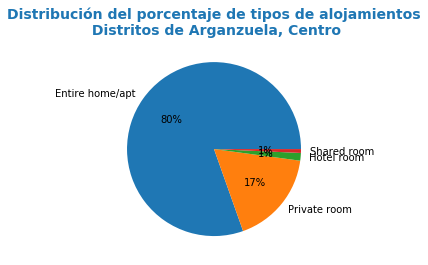

In [25]:
def evolucion_tipo_deuda(deuda, paises, tipo):
    ''' Función que dibuja un diagrama de líneas con la evolución de un tipo de deuda y una lista de países dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - paises: Es una lista de cadenas con los nombres de los países.
        - tipo: Es una cadena con el tipo de deuda.
    '''

    # Filtramos los países y el tipo de deuda
    deuda_filtro = deuda[(deuda.PaisId.isin(paises)) & (deuda.TipoId == tipo)]
    # Convertimos la fecha en el índice
    deuda_filtro.set_index('Fecha', inplace=True)
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
    deuda_filtro.groupby('PaisId').Cantidad.plot(legend=True, ax=ax)
    # Añadimos el título
    ax.set_title('Evolución de ' + tipo, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Guardamos el gráfico.
    plt.savefig('img/evolucion-tipo-deuda-' +
                tipo + '.png', bbox_inches='tight')
    return

# Ejemplo
evolucion_tipo_deuda(deuda, ['GEO', 'SLV', 'MDA'], 'Deuda interna')

In [ ]:
11. Crear una función que reciba un país y una lista de tipos de deuda y dibuje un diagrama de líneas con la evolución de esos tipos de deuda de ese país (una línea por tipo de deuda).

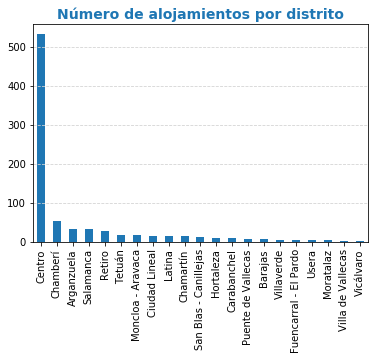

In [26]:
def evolucion_deuda_pais(deuda, pais, tipos):
    ''' Función que dibuja un diagrama de líneas con la evolución de unos tipos de deuda y un país dado.

    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - pais: Es un cadena con el nombre del país.
        - tipos: Es una lista de cadenas con los tipo de deuda.
    '''

    # Filtramos el país y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.TipoId.isin(tipos))]
    # Convertimos la fecha en el índice
    deuda_filtro.set_index('Fecha', inplace=True)
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
    deuda_filtro.groupby('TipoId').Cantidad.plot(legend=True, ax=ax)
    # Añadimos el título
    ax.set_title('Evolución de los tipos de deuda de ' + pais, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Guardamos el gráfico.
    plt.savefig('img/evolucion-deuda-' + pais + '.png', bbox_inches='tight')
    return


# Ejemplo
evolucion_deuda_pais(deuda, 'SLV', ['Deuda interna', 'Deuda externa'])

In [ ]:
12. Crear una función que reciba una lista de países y una lista de tipos de deuda, y dibuje un diagrama de cajas con las deudas de esos tipos de esos países (una caja por país y tipo de deuda).

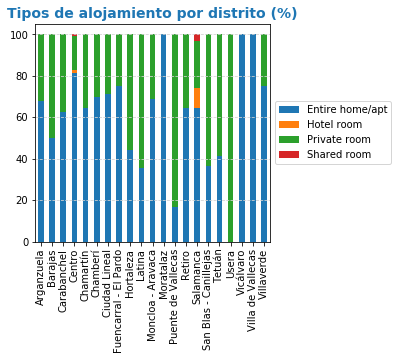

In [27]:
def cajas_deuda(deuda, paises, tipos):
    ''' Función que dibuja un diagrama de cajas con las deudas de unos tipos y unos países dados.

    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - paises: Es una lista de cadenas con los nombres de los países.
        - tipos: Es una lista de cadenas con los tipo de deuda.
    '''

    # Filtramos el país y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId.isin(paises)) &
                         (deuda.TipoId.isin(tipos))]
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de cajas
    deuda_filtro.boxplot(column='Cantidad', by=['PaisId', 'TipoId'], ax=ax)
    # Añadimos el título
    ax.set_title('Deuda de ' + ', '.join(paises) + '\n(' + ', '.join(tipos) + ')',
                 loc="center", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    plt.suptitle('')
    # Rotamos las etiquetas del eje x
    plt.xticks(rotation=90)
    # Guardamos el gráfico.
    plt.savefig('img/cajas-deuda-' + '-'.join(paises) + '-' +
                '-'.join(tipos) + '.png', bbox_inches='tight')
    return


# Ejemplo
cajas_deuda(deuda, ['BOL', 'MDA', 'SLV'], ['Deuda interna', 'Deuda externa'])

In [ ]:
13. Preprocesar el fichero del PIB crear un data frame con el país, la fecha y el PIB.

In [ ]:
14. Crear una función que reciba un país y dibuje la evolución de la deuda pública total como porcentaje del PIB.

In [ ]:
15. Crear una función que reciba un país devuelva un diccionario con los años y si el endeudamiento en esa fecha era insostenible. Se considera un endeudamiento insostenible si durante los tres años anteriores el porcentaje de deuda pública con respecto al PIB es superior al 20%.